In [4]:
from random import random
import numpy as np
import pygame
import sqlite3
import pandas as pd
import time
from PyDictionary import PyDictionary 
import joblib
import os
pygame.init()

con = sqlite3.connect("database.db")
con_work = sqlite3.connect("database_work.db")
conold = sqlite3.connect("database_old1.db")

In [11]:
os.getcwd()
os.path.dirname(os.getcwd())

'/Users/marclamy/Desktop/code'

In [93]:
# logged_score_multiplier = {}
# for num in np.arange(0, 1.001, 0.001):
#     if num == 0:
#         logged_score_multiplier[1] = 10

#     else:
#         logged_score_multiplier[round(1 - num, 3)] = round(abs(np.log2(num)), 2)

# logged_score_multiplier[0.960] - logged_score_multiplier[1], logged_score_multiplier

In [129]:
con = sqlite3.connect("database.db")
con_work = sqlite3.connect("database_work.db")
conold = sqlite3.connect("database_old1.db")



logged_score_multiplier = {}
for num in np.arange(0, 1.001, 0.001):
    if num == 0:
        logged_score_multiplier[1] = 10

    else:
        logged_score_multiplier[round(1 - num, 3)] = round(abs(np.log2(num)), 2)



# Get the score for each game with a word count > 20
query_high_score = """
    with tb1 as (
        select
            game_id
            , datetime(max(time), 'unixepoch', 'localtime') Datetime
            , max(time) - min(time) game_duration
            , sum(case when correct_key = 1 then 1 else 0 end) keys_to_press
            , count(*) keys_pressed
            , round(CAST(sum(case when correct_key = 1 then 1 else 0 end) as REAL) / count(*), 3) * 100 accuracy
            , round(sum(case when correct_key = 1 then 1 else 0 end) / ((max(time) - min(time)) / 60) / 5, 2) wpm
            , row_number() over()

        from keys_pressed
        left join games_settings gs using(game_id)
        where 1=1
            and sentence_length >= 25
            and game_id > 100
        group by 1
        )

        select 
            *
            , row_number() over(order by Datetime asc)
        from tb1
        order by Datetime asc

    """
df_high_score = pd.read_sql_query(query_high_score, con)
# df_high_score['kps'] = df_high_score['keys_to_press'] / df_high_score['game_duration']
# df_high_score['score'] = ((df_high_score['kps'] * df_high_score['accuracy'].apply(lambda acc: logged_score_multiplier[round(acc/100, 3)])).round(2) * 100).astype(int)
df_high_score['score'] = df_high_score['wpm'] * df_high_score['accuracy'] / 100
df_high_score.query('wpm > 55').sort_values('score').tail(20)


# display(df_high_score)

,game_id,Datetime,game_duration,keys_to_press,keys_pressed,accuracy,wpm,row_number() over(),row_number() over(order by Datetime asc),score
65,6653212959,2022-09-13 15:16:26,49.896874,229,244,93.9,55.07,54,66,51.71073
3,9054866305,2022-09-10 15:58:31,40.651821,188,198,94.9,55.50,76,4,52.66950
51,4720037054,2022-09-13 08:18:49,47.347770,221,234,94.4,56.01,38,52,52.87344
64,9257977042,2022-09-13 15:15:29,55.305549,256,268,95.5,55.55,78,65,53.05025
67,1471542704,2022-09-14 21:24:41,42.033683,193,200,96.5,55.10,10,68,53.17150
71,4108595566,2022-09-15 12:56:33,44.356326,207,216,95.8,56.00,31,72,53.64800
33,3376075280,2022-09-12 08:42:13,61.830834,288,298,96.6,55.89,21,34,53.98974
61,5052886517,2022-09-13 15:01:48,42.540440,201,211,95.3,56.70,43,62,54.03510
38,1927548881,2022-09-12 11:41:10,45.183266,209,214,97.7,55.51,13,39,54.23327
25,9312656466,2022-09-11 15:15:31,47.496214,226,238,95.0,57.10,79,26,54.24500


In [121]:
df = pd.read_html('https://keyhero.com/')[0]

def d(x):
    try: return ''.join([num for num in x.split(' ')[0] if num.isdigit()])
    except: print(x)
df['wpm'] = df['WPM'].apply(lambda x: d(x)).astype(int) / 100 * (df['Accuracy'].apply(lambda x: d(x)).astype(int) / 100)
df

,Name,WPM,Accuracy,wpm
0,user871724,183.56 on Mr. Meeseeks - rick and morty,100%,183.5600
1,hololivefan,176.74 on Elijah Mikaelson,100%,176.7400
2,penguino_beano,168.93 on Sophia Zheng,100%,168.9300
3,berryberryberry,165.19 on Mariah Carey,95.3%,1574.2607
4,user491757,161.34 on Jatin Yadav,99.4%,1603.7196
5,venerated,160.28 on Chris Evans,98.9%,1585.1692
6,name_999,151.75 on Your Fellow Typist,99.2%,1505.3600
7,kjackson22,147.32 on Breezy12405,100%,147.3200
8,alliekarakosta,144.36 on Daniel Kahneman,99.5%,1436.3820
9,strikeemblem,142.45 on Rue Bennett,100%,142.4500


In [21]:
# pd.read_sql_query('select game_id, count(game_id) from keys_typed group by 1', con)#.query('game_id == 8882671311')
query = """
with tb1 as (
select
    key
    , correct_key
    , lead(key) over(partition by game_id order by game_id, time) following_key
    , time
    , lead(time) over(partition by game_id order by game_id, time) following_time
    , game_id

from keys_pressed
where 1=1

)


select * from tb1
"""

pd.read_sql_query(query, con)

,key,correct_key,following_key,time,following_time,game_id
0,t,1,r,1.663422e+09,1.663422e+09,0
1,r,1,o,1.663422e+09,1.663422e+09,0
2,o,1,o,1.663422e+09,1.663422e+09,0
3,o,1,p,1.663422e+09,1.663422e+09,0
4,p,1,i,1.663422e+09,1.663441e+09,0
...,...,...,...,...,...,...
22783,s,1,e,1.663093e+09,1.663093e+09,9921650305
22784,e,1,a,1.663093e+09,1.663093e+09,9921650305
22785,a,1,s,1.663093e+09,1.663093e+09,9921650305
22786,s,1,e,1.663093e+09,1.663093e+09,9921650305


In [22]:
# pd.read_sql_query('select game_id, count(game_id) from keys_typed group by 1', con)#.query('game_id == 8882671311')
query = """
with tbl1 as (
select
    key
    , lead(key) over(partition by game_id order by game_id, time) following_key
    , time
    , lead(time) over(partition by game_id order by game_id, time) following_time
    , game_id

from keys_pressed
where 1=1
    and correct_key = 1
    and game_id > 20
    --and game_id in (3701467168, 5916786024)

)

select 
    --key || '-' || following_key as key_combination
    following_key
    , avg(following_time - time) as time_diff
    , count(*) count

from tbl1
where 1=1
    and 'space' not in (key, following_key)
    and following_key is not null
group by 1
having 1=1
    and count > 20
order by time_diff asc
"""

pd.read_sql_query(query, con)

,following_key,time_diff,count
0,n,0.187098,1279
1,h,0.197477,356
2,e,0.198030,2241
3,l,0.201747,840
4,a,0.204618,1222
5,o,0.210879,1230
6,i,0.215451,1382
7,u,0.236430,523
8,t,0.241610,1337
9,r,0.246237,1305


In [ ]:
# import os
# current_dir = os.getcwd()

# def pick_words(word_list, max_word_length, sentence_length=10):
#     '''returns a word based on criterias'''

#     random_word = []
#     while len(random_word) < sentence_length:
#         picked_word = np.random.choice(word_list).lower()

#         if max_word_length == None:
#             random_word.append(picked_word)

#         elif len(picked_word) <= max_word_length:
#             random_word.append(picked_word)

#     sentence = random_word
#     # sentence = capitalize_random(sentence)

#     return ' '.join(sentence)


# def load_text (file_path=f'{current_dir}/data/common_words.txt') -> list:
#     '''a '''
#     with open(file_path) as file: 
#         all_words = file.read().split('\n')

#     return all_words


# df_ranking_words = pd.DataFrame(load_text(), columns=['words'])
# df_ranking_words['q_ratio'] = df_ranking_words['words'].str.count('q') / df_ranking_words['words'].str.len()
# df_ranking_words.sort_values('q_ratio', ascending=False).head(20)

In [4]:
import os
current_dir = os.getcwd()


def pick_words(word_list, max_word_length, sentence_length=10):
    '''returns a word based on criterias'''

    random_word = []
    while len(random_word) < sentence_length:
        picked_word = np.random.choice(word_list).lower()

        if max_word_length == None:
            random_word.append(picked_word)

        elif len(picked_word) <= max_word_length:
            random_word.append(picked_word)


    sentence = random_word
    # sentence = capitalize_random(sentence)

    return ' '.join(sentence)


def load_text (file_path=f'{current_dir}/data/common_words.txt') -> list:
    '''a '''
    with open(file_path) as file: 
        all_words = file.read().split('\n')

    return all_words


df_ranking_words = pd.DataFrame(load_text(), columns=['words'])
df_ranking_words['q_ratio'] = df_ranking_words['words'].str.count('q') / df_ranking_words['words'].str.len()
df_ranking_words.sort_values('q_ratio', ascending=False).head(20)

,words,q_ratio
2122,quit,0.250000
919,equal,0.200000
2124,quote,0.200000
2118,quick,0.200000
1426,Iraqi,0.200000
2120,quiet,0.200000
2123,quite,0.200000
2514,square,0.166667
2815,unique,0.166667
1381,inquiry,0.142857


In [5]:
df_ranking_words = pd.DataFrame(load_text(), columns=['words'])
df_ranking_words['q_ratio'] = df_ranking_words['words'].str.count('q') / df_ranking_words['words'].str.len()
df_ranking_words.sort_values('q_ratio', ascending=False).head(20)

,words,q_ratio
2122,quit,0.250000
919,equal,0.200000
2124,quote,0.200000
2118,quick,0.200000
1426,Iraqi,0.200000
2120,quiet,0.200000
2123,quite,0.200000
2514,square,0.166667
2815,unique,0.166667
1381,inquiry,0.142857


In [47]:
 # pd.read_sql_query('select game_id, count(game_id) from keys_typed group by 1', con)#.query('game_id == 8882671311')
query = """
with tb1 as (
select
    key
    , time
    , max(time) over(partition by game_id order by time rows between unbounded preceding and current row) max_time
    , min(time) over(partition by game_id order by time rows between unbounded preceding and current row) min_time
    , sum(case when correct_key = 1 then 1 else 0 end) over(partition by game_id order by time rows between unbounded preceding and current row) count_correct

from keys_pressed
)

select 
    key
    , time
    , count_correct / ((max_time - min_time) / 60) / 4.7 wpm

from tb1
"""

df_wpm_perletter = pd.read_sql_query(query, con)
df_wpm_perletter

,key,time,wpm
0,d,1.663381e+09,NaN
1,e,1.663381e+09,97.750418
2,p,1.663381e+09,108.846188
3,e,1.663381e+09,112.799600
4,n,1.663381e+09,92.733793
...,...,...,...
22300,s,1.663093e+09,56.603845
22301,e,1.663093e+09,56.437136
22302,a,1.663093e+09,56.449299
22303,s,1.663093e+09,56.374795


In [5]:
 # pd.read_sql_query('select game_id, count(game_id) from keys_typed group by 1', con)#.query('game_id == 8882671311')
query = """
with tbl1 as (
select
    game_id
    , date(max(time), 'unixepoch', 'localtime') Date
    , max(time) - min(time) game_duration
    , sum(case when correct_key = 1 then 1 else 0 end) keys_to_press
    , count(*) keys_pressed
    , round(CAST(sum(case when correct_key = 1 then 1 else 0 end) as REAL) / count(*), 3) * 100 accuracy
    , round(sum(case when correct_key = 1 then 1 else 0 end) / ((max(time) - min(time)) / 60) / 4.7) wpm

from keys_pressed
where 1=1
    --and game_id = 3513153090
group by 1
having
    count(*) >= 10
)

select * from tbl1
--where wpm = (select max(wpm) from tbl1)
order by 2
"""

df_high_score = pd.read_sql_query(query, con).reset_index()
df_high_score['index'] = df_high_score['index'] + 1
df_high_score

,index,game_id,Date,game_duration,keys_to_press,keys_pressed,accuracy,wpm
0,1,3240419914,2022-09-09,5.483931,22,22,100.0,51.0
1,2,7401357469,2022-09-09,6.994218,25,25,100.0,46.0
2,3,2094541913,2022-09-10,51.373182,206,220,93.6,51.0
3,4,2769402107,2022-09-10,84.256178,330,348,94.8,50.0
4,5,4593746653,2022-09-10,5.794087,18,19,94.7,40.0
...,...,...,...,...,...,...,...,...
89,90,8082054756,2022-09-16,54.011612,214,237,90.3,51.0
90,91,8495475871,2022-09-16,66.379942,263,281,93.6,51.0
91,92,9811368983,2022-09-16,72.829292,287,306,93.8,50.0
92,93,0,2022-09-17,21094.233186,45,53,84.9,0.0


,index,game_id,Date,game_duration,keys_to_press,keys_pressed,accuracy,wpm
0,1,3240419914,2022-09-09,5.483931,22,22,100.0,51.0
1,2,7401357469,2022-09-09,6.994218,25,25,100.0,46.0
2,3,2094541913,2022-09-10,51.373182,206,220,93.6,51.0
3,4,2769402107,2022-09-10,84.256178,330,348,94.8,50.0
4,5,4593746653,2022-09-10,5.794087,18,19,94.7,40.0
...,...,...,...,...,...,...,...,...
88,89,5805126288,2022-09-16,49.118119,202,210,96.2,53.0
89,90,8082054756,2022-09-16,54.011612,214,237,90.3,51.0
90,91,8495475871,2022-09-16,66.379942,263,281,93.6,51.0
91,92,9811368983,2022-09-16,72.829292,287,306,93.8,50.0


<AxesSubplot:>

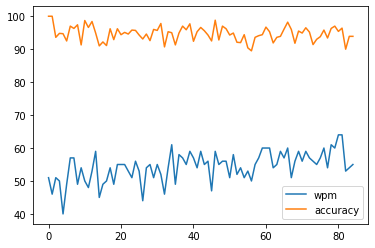

In [8]:
df_high_score[['wpm', 'accuracy']].plot.line()

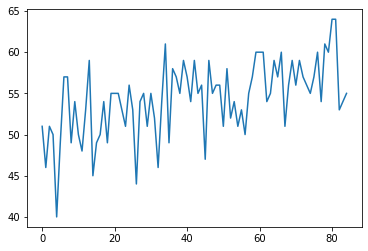

In [10]:
df_high_score['wpm'].plot.line()
import plotly.express as px

px.scatter(df_high_score, y='wpm')

In [100]:
game_duration = df_high_score.loc[0, 'game_duration']
keys_to_press = df_high_score.loc[0, 'keys_to_press']
keys_pressed = df_high_score.loc[0, 'keys_pressed']
accuracy = df_high_score.loc[0, 'accuracy']
wpm = df_high_score.loc[0, 'wpm']

In [69]:
df = pd.read_json('/Users/marclamy/Downloads/typing-data (2).json')
df['time'] = df['time'] / 1000

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df[['length', 'time', 'errors']], df['speed'])
model.score(df[['length', 'time', 'errors']], df['speed'])

0.9219377330563562

In [72]:
model.intercept_, model.coef_

(202.87879686319644, array([ 1.27523277, -4.22258501, -0.20564769]))

In [68]:
model.intercept_

202.87879686319636

In [74]:
s = '''the_wide_aunt_known_gain_when_surages_and_cons-ther_but.
and_willins_withough-probable_own_sure_atten_chall.her_
wood-rece_and_what.the_she_you_here_him_fetc_sortle_witch_
oblight'''
len([x for x in s if x.isalpha()])

144

In [ ]:
[144, ]

In [16]:
words = ['jene', 'suis', 'jadkfj', 'jfdkljf']
common_chars = ['()', '{}', '[]', '!', "''", '*', ',', '.', ';', ':']

def add_char (words: list):
    common_chars = ['()', '{}', '[]', '!', "''", '*', ',', '.', ';', ':']


    for index, word in enumerate(words):
        rdm_char = np.random.choice(common_chars)

        if len(rdm_char) == 2:
            word = rdm_char[0] + word + rdm_char[1]
        else:
            word += rdm_char

        words[index] = word



words    



SyntaxError: invalid syntax (469069334.py, line 4)

In [2]:
import sqlite3a
con = sqlite3.connect("database.db")


In [21]:
con = sqlite3.connect("database.db")
pd.DataFrame({'key': ['a'], 'time': [time.time()]}).to_sql('keys_typed', con, if_exists='append', index=False)

1

In [20]:
for _ in tqdm(range(100000)):
    con = sqlite3.connect("database.db")
    pd.DataFrame({'key': ['a'], 'time': [time.time()]}).to_sql('keys_typed', con, if_exists='append', index=False)
    

 63%|██████▎   | 63357/100000 [00:44<00:25, 1432.24it/s]


KeyboardInterrupt: 

In [67]:
a = list(range(len('ffffffffff')))
np.random.shuffle(a)
a[]

[7, 0, 4, 2, 3, 8, 1, 6, 5, 9]

In [195]:
st = """{'`': '~',
 '1': '!',
 '2': '@',
 '3': '#',
 '4': '$',
 '5': '%',
 '6': '^',
 '7': '&',
 '8': '*',
 '9': '(',
 '0': ')',
 '-': '_',
 '=': '+',
 'q': 'Q',
 'w': 'W',
 'e': 'E',
 'r': 'R',
 't': 'T',
 'y': 'Y',
 'u': 'U',
 'i': 'I',
 'o': 'O',
 'p': 'P',
 '[': '{',
 ']': '}',
 '\\': '|',
 'a': 'A',
 's': 'S',
 'd': 'D',
 'f': 'F',
 'g': 'G',
 'h': 'H',
 'j': 'J',
 'k': 'K',
 'l': 'L',
 ';': ':',
 "'": '"',
 'z': 'Z',
 'x': 'X',
 'c': 'C',
 'v': 'V',
 'b': 'B',
 'n': 'N',
 'm': 'M',
 ',': '<',
 '.': '>',
 '/': '?'}"""

print(st.replace("'", '"'))

{"`": "~",
 "1": "!",
 "2": "@",
 "3": "#",
 "4": "$",
 "5": "%",
 "6": "^",
 "7": "&",
 "8": "*",
 "9": "(",
 "0": ")",
 "-": "_",
 "=": "+",
 "q": "Q",
 "w": "W",
 "e": "E",
 "r": "R",
 "t": "T",
 "y": "Y",
 "u": "U",
 "i": "I",
 "o": "O",
 "p": "P",
 "[": "{",
 "]": "}",
 "\": "|",
 "a": "A",
 "s": "S",
 "d": "D",
 "f": "F",
 "g": "G",
 "h": "H",
 "j": "J",
 "k": "K",
 "l": "L",
 ";": ":",
 """: """,
 "z": "Z",
 "x": "X",
 "c": "C",
 "v": "V",
 "b": "B",
 "n": "N",
 "m": "M",
 ",": "<",
 ".": ">",
 "/": "?"}


In [212]:
dic = {"`": "~",
 "1": "!",
 "2": "@",
 "3": "#",
 "4": "$",
 "5": "%",
 "6": "^",
 "7": "&",
 "8": "*",
 "9": "(",
 "0": ")",
 "-": "_",
 "=": "+",
 "q": "Q",
 "w": "W",
 "e": "E",
 "r": "R",
 "t": "T",
 "y": "Y",
 "u": "U",
 "i": "I",
 "o": "O",
 "p": "P",
 "[": "{",
 "]": "}",
 "'\'": "|",
 "a": "A",
 "s": "S",
 "d": "D",
 "f": "F",
 "g": "G",
 "h": "H",
 "j": "J",
 "k": "K",
 "l": "L",
 ";": ":",
 "'": '"',
 "z": "Z",
 "x": "X",
 "c": "C",
 "v": "V",
 "b": "B",
 "n": "N",
 "m": "M",
 ",": "<",
 ".": ">",
 "/": "?"}


print(dic)

{'`': '~', '1': '!', '2': '@', '3': '#', '4': '$', '5': '%', '6': '^', '7': '&', '8': '*', '9': '(', '0': ')', '-': '_', '=': '+', 'q': 'Q', 'w': 'W', 'e': 'E', 'r': 'R', 't': 'T', 'y': 'Y', 'u': 'U', 'i': 'I', 'o': 'O', 'p': 'P', '[': '{', ']': '}', "''": '|', 'a': 'A', 's': 'S', 'd': 'D', 'f': 'F', 'g': 'G', 'h': 'H', 'j': 'J', 'k': 'K', 'l': 'L', ';': ':', "'": '"', 'z': 'Z', 'x': 'X', 'c': 'C', 'v': 'V', 'b': 'B', 'n': 'N', 'm': 'M', ',': '<', '.': '>', '/': '?'}


In [204]:
import json 
d = json.dumps(dic)

In [206]:
with open('data/key_map.json', 'w') as f:
    json.dump(d, f)

In [174]:
dir(get)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [183]:
get.index()

TypeError: index expected at least 1 argument, got 0

In [30]:
%%timeit -n 10000

df = pd.DataFrame([123, 2, 3])
df.assign(multi=1)

120 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
%%timeit -n 10000

df = pd.DataFrame([123, 2, 3])
df["multi"] = 1

108 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [33]:
%%timeit -n 50000

scalar = 2
df = pd.DataFrame({"Month": ["Jan", "Feb", "Mar"], "Volume": [i*scalar for i in [1,2,3]]}).assign(multi=1)

139 µs ± 444 ns per loop (mean ± std. dev. of 7 runs, 50,000 loops each)


In [35]:
%%timeit -n 50000

scalar = 2
df = pd.DataFrame({"Month": ["Jan", "Feb", "Mar"], "Volume": [i*scalar for i in [1,2,3]]})
df["multi"] = scalar

124 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 50,000 loops each)


In [43]:
df = pd.read_fwf("https://github.com/dwyl/english-words/blob/master/words_alpha.txt", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973
0,<!DOCTYPE html>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"<html lang=""en"" data-color-mode=""auto"" data-li...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,<head>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"<meta charset=""utf-8"">",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"<link rel=""dns-prefetch"" href=""https://github....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,</clipboard-copy>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,</div>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,</template>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,</body>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
game_settings = [sentence, sentence_length, max_word_length, game_id, capitalized_words_count, capitalized_letters_count_perc, punctuation_word_count_perc, force_shift]

In [45]:
 # pd.read_sql_query('select game_id, count(game_id) from keys_typed group by 1', con)#.query('game_id == 8882671311')
query = """
select * from games_settings
"""

df = pd.read_sql_query(query, con)
df = df.drop('capitalized_letters_count', axis=1)

df.to_sql('games_settings', con_work, if_exists='replace', index=False)
# game_id = np.random.randint(10**10)
# sentence_length = np.random.randint(25, 40)
# max_word_length = None
# capitalized_words_count = 1 # Set a float between 0 and 1 for the percentage of word that will be generated with a/multiple random case letter
# capitalized_letters_count = .1 # Set a float between 0 and 1 for the percentage of the letters of the word that will be capitalized. Set an integer for the nmumber or random case statement letters. 1 is all letters capitalized not 1 word. if 'first' then only first letter will be capitalized
# capitalized_letters_count
# force_shift = False # Force to type the right shift of the keyboard

97

In [44]:
df.columns

Index(['sentence', 'sentence_length', 'max_word_length', 'game_id',
       'capitalized_words_count', 'capitalized_letters_count_perc',
       'capitalized_letters_count', 'punctuation_word_count_perc',
       'force_shift'],
      dtype='object')

In [3]:

# import pandas as pd
import sqlite3
import pandas as pd

# Load data from dbs
con = sqlite3.connect(f"database.db")


query_high_score = """
    select * from keys_pressed
    """
df_high_score = pd.read_sql_query(query_high_score, con)
print(df_high_score)


      key  correct_key          time     game_id
0       c            1  1.662781e+09  7401357469
1       o            1  1.662781e+09  7401357469
2       m            1  1.662781e+09  7401357469
3       b            1  1.662781e+09  7401357469
4       i            1  1.662781e+09  7401357469
...    ..          ...           ...         ...
22783   e            1  1.663446e+09          99
22784   s            1  1.663451e+09          99
22785   t            1  1.663451e+09          99
22786   o            1  1.663451e+09          99
22787   p            1  1.663451e+09          99

[22788 rows x 4 columns]


In [ ]:
['sentence', 'sentence_length', 'max_word_length', 'game_id', 'capitalized_words_count', 'capitalized_letters_count_perc', 'capitalized_letters_count', 'punctuation_word_count_perc', 'force_shift']
['sentence', 'sentence_length', 'max_word_length', 'game_id', 'capitalized_words_count', 'capitalized_letters_count_perc', 'capitalized_letters_count', 'punctuation_word_count_perc', 'force_shift']